# Stock Market Data Analysis

Stock Market Analysis and Prediction is the project related to Exploratory data analysis(EDA), Data visualization and Predictive analysis using data, provided by [The Investors Exchange (IEX)](https://iextrading.com/apps/stocks/). I looked at real-time financial data from the stock market. I have used python libraries to get stock information, visualize different aspects of it, and finally I worked at a few ways of analyzing the risk of a stock, based on its previous performance history. I have also used statistical method called Monte Carlo Method to predict future stock prices.

We'll be answering the following questions along the way:

* What was the change in price of the stock over time?
* What was the daily return of the stock on average?
* What was the moving average of the various stocks?
* What was the correlation between different stocks' closing prices?
* What was the correlation between different stocks' daily returns?
* How much value do we put at risk by investing in a particular stock?
* How can we attempt to predict future stock behavior?

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install yfinance --upgrade

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


A library to download financial market data from yahoo finance.This can be used to download stock market data form india as well as other global market

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import yfinance as yf


Download the historical stock data from the specific compnay listed on the indian stock  maket using yfinance library.

In [4]:
stock = "RELIANCE.NS"

rel_data = yf.download(stock,start = '2022-08-01', end= '2023-01-18')
rel_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,2519.149902,2587.750000,2507.600098,2574.850098,2567.121094,7245568
2022-08-02,2572.500000,2607.800049,2561.550049,2584.649902,2576.891602,6423115
2022-08-03,2600.000000,2610.000000,2567.449951,2606.350098,2598.526611,6576824
2022-08-04,2610.000000,2617.750000,2535.000000,2571.899902,2564.179932,6676577
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2526.393799,6434433


In [5]:
rel_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,116.000000,116.000000,116.000000,116.000000,116.000000,1.160000e+02
mean,2551.131463,2574.439215,2527.946135,2550.568117,2549.829028,5.000061e+06
std,88.567919,86.384070,88.241978,89.405995,89.046865,2.096734e+06
min,2311.000000,2367.500000,2311.000000,2325.300049,2325.300049,1.555270e+06
25%,2505.574951,2532.875000,2484.087524,2501.799988,2501.799988,3.487700e+06
50%,2571.750000,2594.449951,2546.900024,2568.224976,2565.325073,4.373062e+06
75%,2607.287476,2626.099976,2580.487488,2606.775085,2606.775085,5.812364e+06
max,2741.800049,2755.000000,2716.000000,2731.350098,2731.350098,1.454993e+07


In [6]:
rel_data.shape

(116, 6)

In [7]:
rel_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
rel_data.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.974614,0.974254,0.942911,0.942997,-0.094683
High,0.974614,1.000000,0.966547,0.980243,0.980261,0.004506
Low,0.974254,0.966547,1.000000,0.965665,0.965846,-0.165694
Close,0.942911,0.980243,0.965665,1.000000,0.999678,-0.036051
Adj Close,0.942997,0.980261,0.965846,0.999678,1.000000,-0.037491
Volume,-0.094683,0.004506,-0.165694,-0.036051,-0.037491,1.000000


In [9]:
rel_data['Returns'] = rel_data['Adj Close'].pct_change() # here in Adj close we are seeing percentage between two row

In [10]:
rel_data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2022-08-01,2519.149902,2587.750000,2507.600098,2574.850098,2567.121094,7245568,NaN
2022-08-02,2572.500000,2607.800049,2561.550049,2584.649902,2576.891602,6423115,0.003806
2022-08-03,2600.000000,2610.000000,2567.449951,2606.350098,2598.526611,6576824,0.008396
2022-08-04,2610.000000,2617.750000,2535.000000,2571.899902,2564.179932,6676577,-0.013218
2022-08-05,2576.000000,2578.800049,2526.949951,2534.000000,2526.393799,6434433,-0.014736


Plot the closing prize

Text(0.5, 1.0, 'RELIANCE.NS Closing prize')

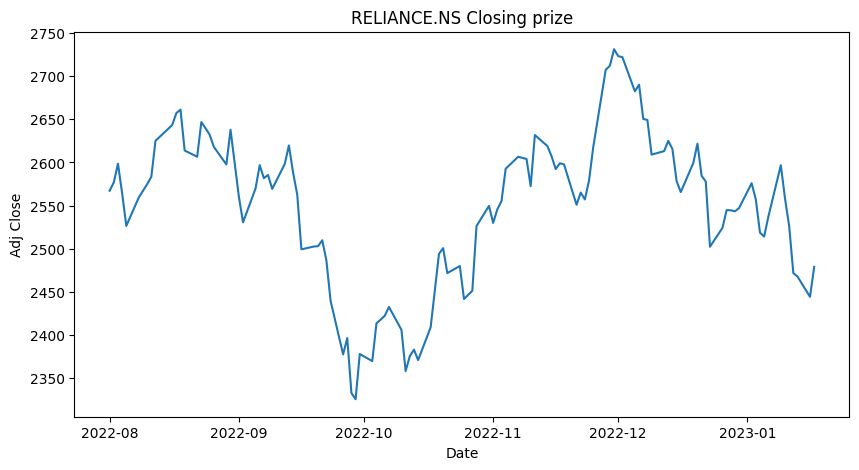

In [11]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data, x = 'Date', y = 'Adj Close')
plt.title(f'{stock} Closing prize')
#plt.show()

Histograms of return

Text(0.5, 0, 'Returns')

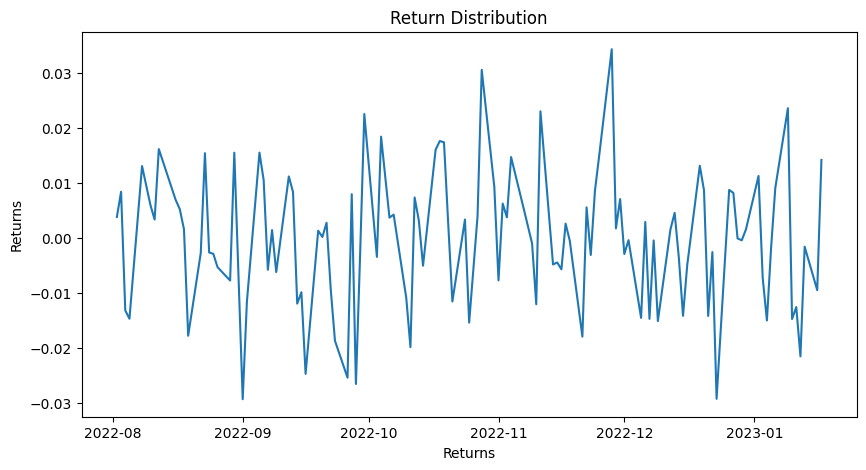

In [12]:
plt.figure(figsize = (10,5))
sns.lineplot(data = rel_data, x = 'Date', y = 'Returns')
plt.title('Return Distribution')
plt.xlabel('Returns')
#plt.show()

<AxesSubplot: xlabel='Date'>

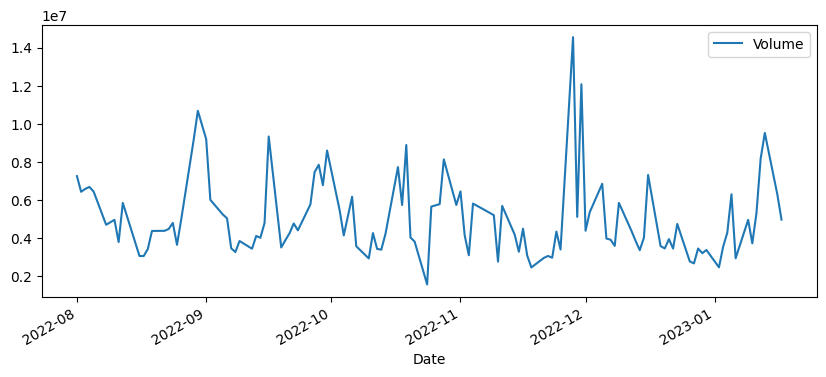

In [13]:
rel_data['Volume'].plot(legend = True, figsize = (10, 4))

#### Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [14]:
#### Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
# for reading the stock data from I E X
import os
import pandas_datareader as pdr
from datetime import datetime

In [16]:
os.environ["IEX_API_KEY"] = "sk_5bdb6470e57d4819a152b9fc1c6508ff"

In [17]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import yfinance as yf
sns.set_style('whitegrid')
%matplotlib inline

Let's use the iexfinance The investors Exchange (IEX) and pandas to grab some date from some technoglogy stocks.

In [18]:
tech_stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [19]:
# SETUP START TIME AND END TIME for data load
end = datetime.now()
end

datetime.datetime(2023, 7, 29, 11, 4, 25, 479625)

In [20]:
start = datetime(end.year - 1, end.month, end.day)
start

datetime.datetime(2022, 7, 29, 0, 0)

In [24]:
 os.environ["IEX_API_KEY"] = "sk_7eb26bff2bc34f0fa0cb194dfe53c05f"

In [25]:
age = 23

globals()['age'] = 25
print('The age is:', age)

The age is: 25


In [26]:
# For loop for grabing iex finance data and setting as a dataframe
 # Set DataFrame as the Stock Ticker
for stock in tech_stocks:
      globals()[stock] = pdr.DataReader(stock,'iex',start,end, api_key=os.getenv('IEX_API_KEY'))

In [29]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2022-07-29,161.240,163.63,159.50,162.51,101786860
2022-08-01,161.010,163.59,160.89,161.51,67829379
2022-08-02,160.100,162.41,159.63,160.01,59907025
2022-08-03,160.840,166.59,160.75,166.13,82507488
2022-08-04,166.005,167.19,164.43,165.81,55474144


In [30]:
AAPL.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,158.434773,160.256677,156.880047,158.648586,7.066894e+07
std,17.369007,17.178225,17.697871,17.450456,2.320476e+07
min,126.010000,127.770000,124.170000,125.020000,3.145820e+07
25%,145.815000,147.340000,144.015000,145.920000,5.383755e+07
50%,154.785000,157.090000,153.370000,155.000000,6.643514e+07
75%,170.772500,172.294150,169.910050,171.540000,8.135484e+07
max,196.020000,198.230000,194.140000,195.830000,1.647624e+08


In [31]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2022-07-29 to 2023-07-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    251 non-null    float64
 1   high    251 non-null    float64
 2   low     251 non-null    float64
 3   close   251 non-null    float64
 4   volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


# Let's see a historical view of the closing price

<AxesSubplot: xlabel='date'>

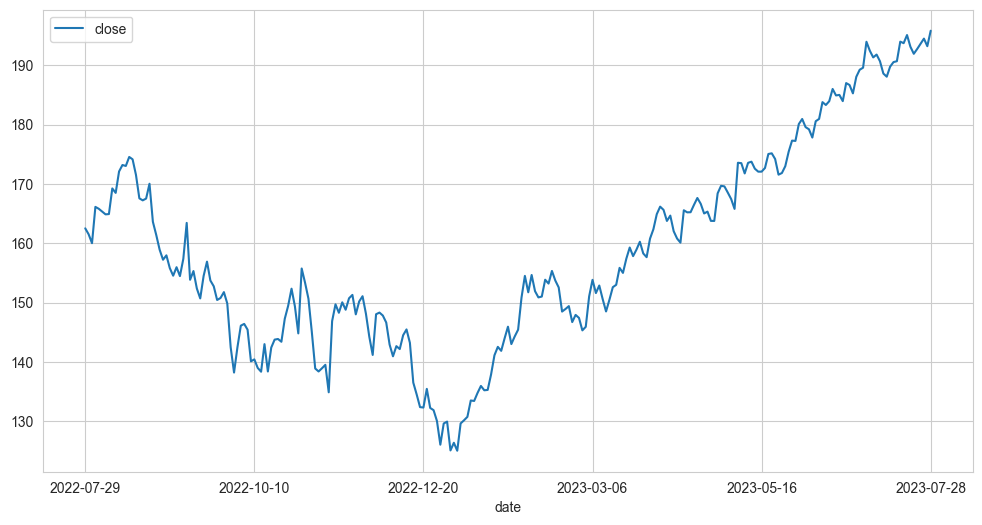

In [32]:
AAPL['close'].plot(legend = True,figsize = (12,6))

# Now let's plot the total volume of stock being traded each day over the past 5 years

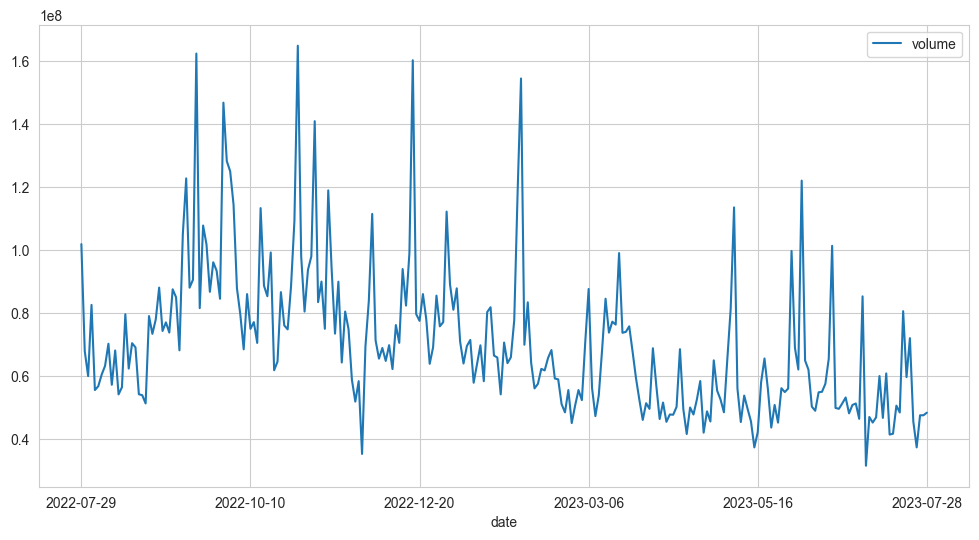

In [33]:
AAPL['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [34]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2022-07-29,113.40,116.90,113.23,116.64,31336183
2022-08-01,115.53,117.12,114.69,115.48,22856202
2022-08-02,114.43,117.08,114.26,115.90,17911039
2022-08-03,116.34,119.42,116.15,118.78,25302816
2022-08-04,118.30,119.50,117.71,118.87,15757698


In [35]:
GOOG.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,105.447843,106.945148,104.286003,105.619064,2.708762e+07
std,11.941814,12.031791,11.973275,12.003771,1.110864e+07
min,85.510000,86.550000,83.450000,83.490000,8.567819e+06
25%,95.760000,97.350000,94.470000,95.840000,2.064669e+07
50%,102.880000,104.220000,101.860000,103.630000,2.436514e+07
75%,116.795000,118.617500,116.515000,117.705000,3.025570e+07
max,131.800000,134.070000,130.920000,133.010000,9.779857e+07


<AxesSubplot: xlabel='date'>

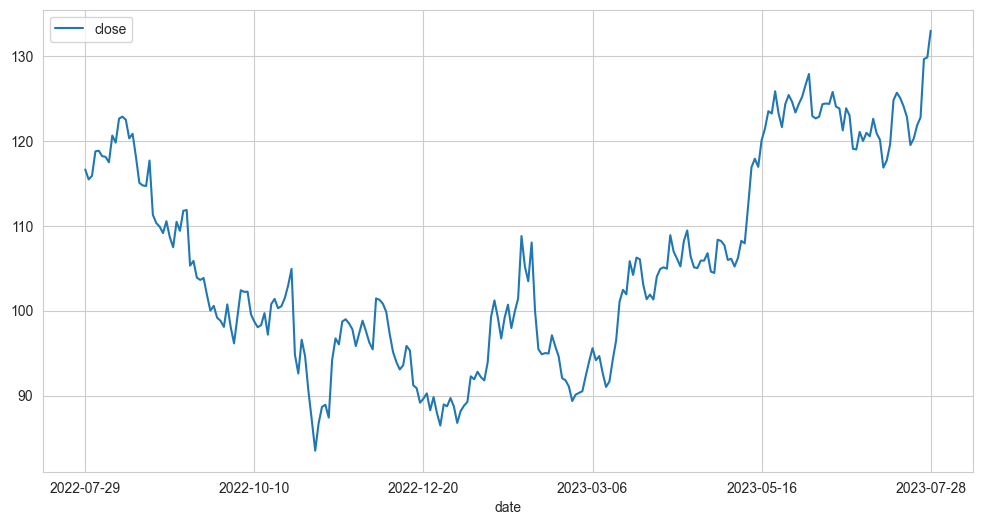

In [36]:
GOOG['close'].plot(legend = True,figsize = (12,6))

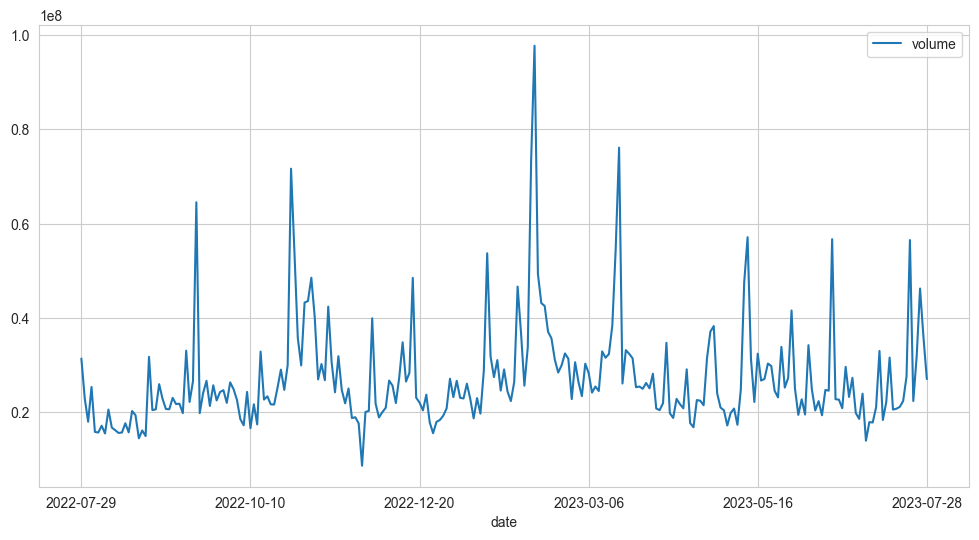

In [37]:
GOOG['volume'].plot(legend = True,figsize = (12,6))
plt.show()

In [38]:
MSFT.head()

,open,high,low,close,volume
date,,,,,
2022-07-29,277.70,282.00,276.630,280.74,32152752
2022-08-01,277.82,281.28,275.840,278.01,21539580
2022-08-02,276.00,277.89,272.380,274.82,22754184
2022-08-03,276.76,283.50,276.610,282.47,23518874
2022-08-04,281.80,283.80,280.168,283.65,18098668


In [39]:
MSFT.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,273.858000,277.036382,270.963433,274.099163,2.921945e+07
std,37.115286,37.249006,37.010800,37.177827,1.091320e+07
min,217.550000,220.410000,213.431000,214.250000,9.200772e+06
25%,243.160000,245.305000,240.265000,242.515000,2.249100e+07
50%,261.690000,266.480000,260.290000,263.100000,2.671921e+07
75%,300.355000,306.481500,299.280000,304.615000,3.245936e+07
max,361.750000,366.780000,352.435000,359.490000,8.610199e+07


<AxesSubplot: xlabel='date'>

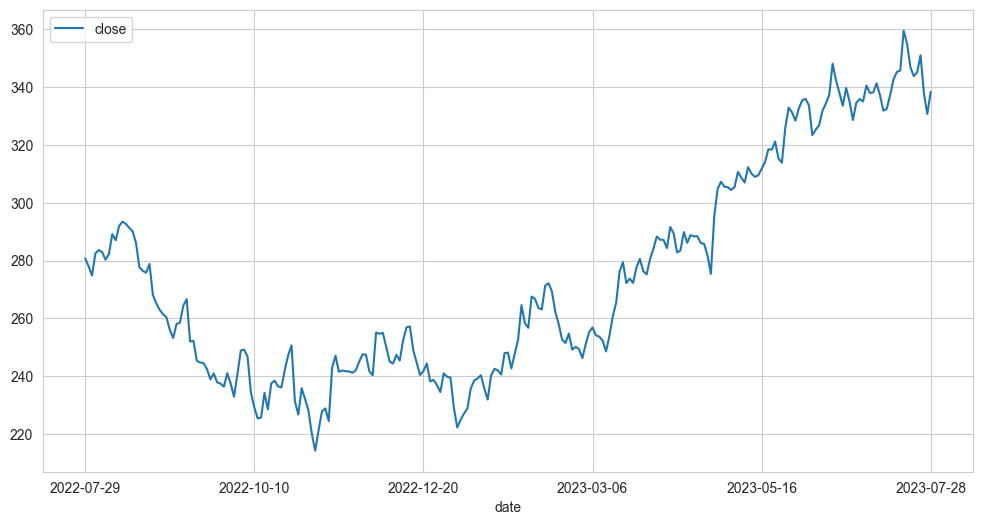

In [40]:
MSFT['close'].plot(legend = True,figsize = (12,6))

<AxesSubplot: xlabel='date'>

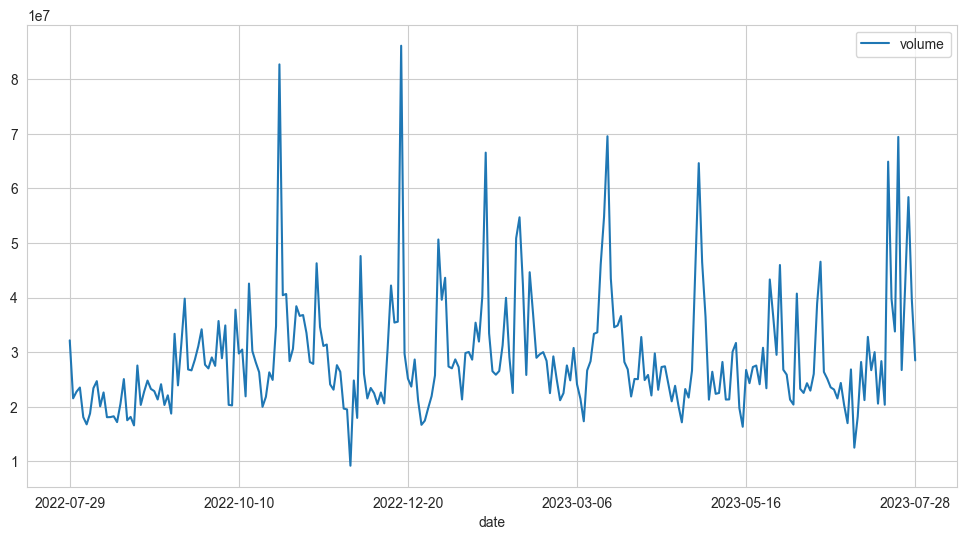

In [41]:
MSFT['volume'].plot(legend = True,figsize = (12,6))

In [42]:
AMZN.head()

,open,high,low,close,volume
date,,,,,
2022-07-29,134.90,137.650,132.41,134.95,148892889.0
2022-08-01,134.96,138.834,133.51,135.39,76846908.0
2022-08-02,134.72,137.440,134.09,134.16,61922429.0
2022-08-03,136.21,140.490,136.05,139.52,71827780.0
2022-08-04,140.58,143.560,139.55,142.57,70585020.0


In [43]:
AMZN.describe()

,open,high,low,close,volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,110.210359,111.863795,108.542451,110.197590,6.359109e+07
std,16.566668,16.720907,16.546411,16.591511,2.786718e+07
min,82.800000,83.480000,81.430000,81.820000,3.520700e+04
25%,96.095000,97.537000,94.195000,96.260000,4.942658e+07
50%,105.040000,106.790000,104.330000,105.655000,5.839889e+07
75%,125.820000,127.545000,124.410000,126.350000,7.216241e+07
max,143.905000,146.570000,142.000000,144.780000,2.231334e+08


<AxesSubplot: xlabel='date'>

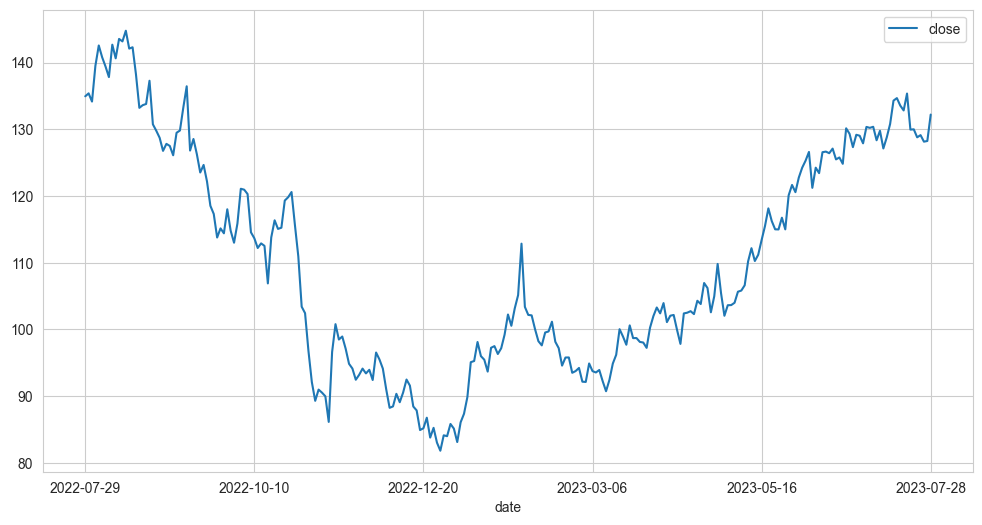

In [44]:
AMZN['close'].plot(legend = True,figsize = (12,6))

<AxesSubplot: xlabel='date'>

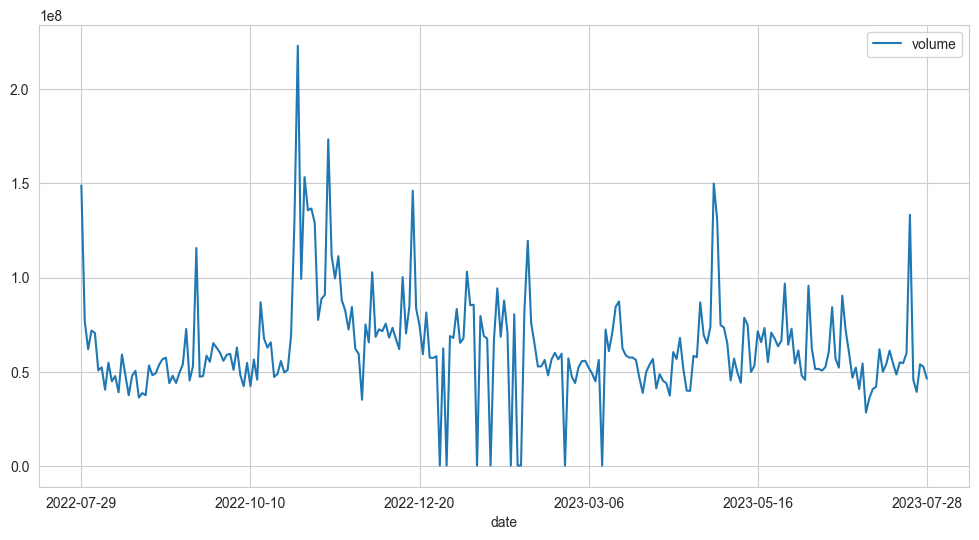

In [45]:
AMZN['volume'].plot(legend = True,figsize = (12,6))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

##### 'Moving Average - MA'
A moving average (MA) is a widely used indicator in technical analysis that helps smooth out price action by filtering out the “noise” from random price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

In [46]:
## Lets go ahead and p[lot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    col_name = "MA for %s days" %(str(ma))
    AAPL[col_name] = pd.DataFrame.rolling(AAPL['close'],ma).mean()

In [48]:
AAPL.head(50)

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days
date,,,,,,,,
2022-07-29,161.240,163.630,159.500,162.51,101786860,NaN,NaN,NaN
2022-08-01,161.010,163.590,160.890,161.51,67829379,NaN,NaN,NaN
2022-08-02,160.100,162.410,159.630,160.01,59907025,NaN,NaN,NaN
2022-08-03,160.840,166.590,160.750,166.13,82507488,NaN,NaN,NaN
2022-08-04,166.005,167.190,164.430,165.81,55474144,NaN,NaN,NaN
2022-08-05,163.210,165.850,163.000,165.35,56696985,NaN,NaN,NaN
2022-08-08,166.370,167.810,164.200,164.87,60362338,NaN,NaN,NaN
2022-08-09,164.020,165.820,163.250,164.92,63135503,NaN,NaN,NaN
2022-08-10,167.680,169.340,166.900,169.24,70170540,NaN,NaN,NaN


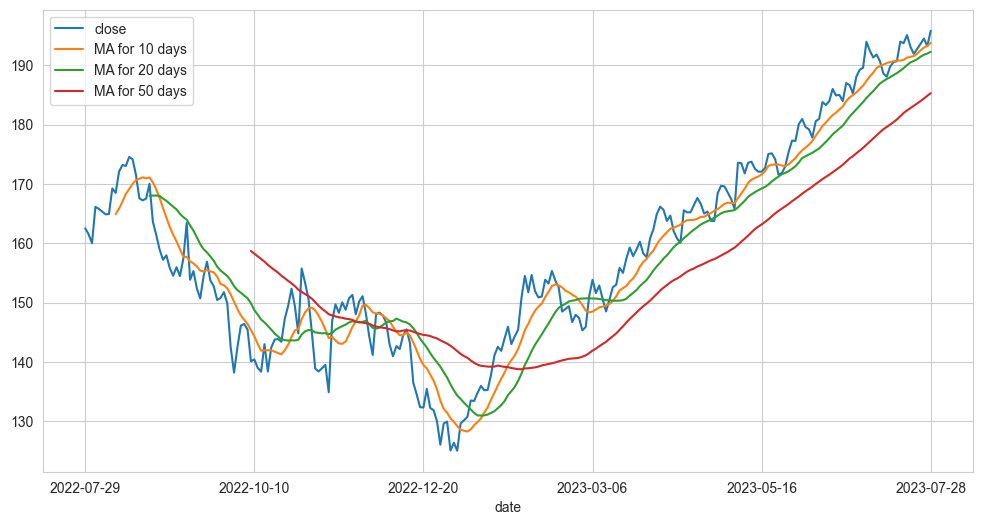

In [49]:
AAPL[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False,figsize = (12,6))
plt.show()

#### Daily Return Analysis
Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

In [52]:
# use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['close'].pct_change()

In [53]:
AAPL.head()

,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
date,,,,,,,,,
2022-07-29,161.240,163.63,159.50,162.51,101786860,NaN,NaN,NaN,NaN
2022-08-01,161.010,163.59,160.89,161.51,67829379,NaN,NaN,NaN,-0.006153
2022-08-02,160.100,162.41,159.63,160.01,59907025,NaN,NaN,NaN,-0.009287
2022-08-03,160.840,166.59,160.75,166.13,82507488,NaN,NaN,NaN,0.038248
2022-08-04,166.005,167.19,164.43,165.81,55474144,NaN,NaN,NaN,-0.001926


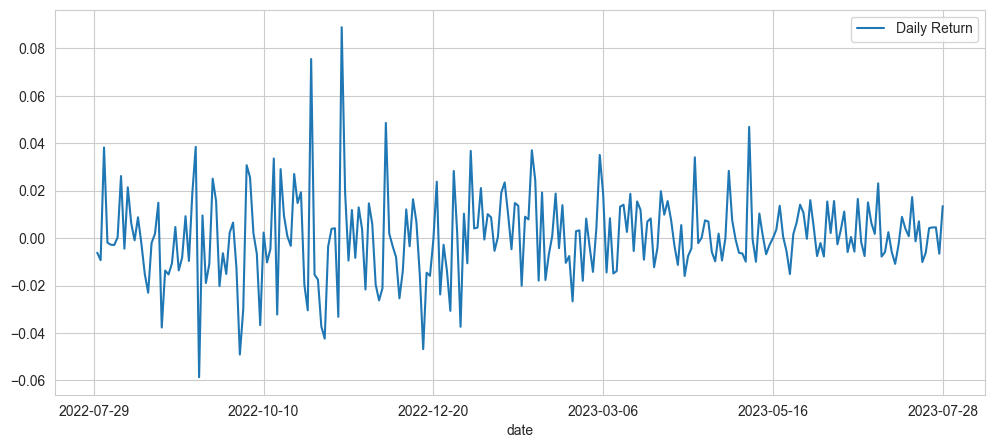

In [54]:
AAPL['Daily Return'].plot(figsize=(12,5),legend = True)
plt.show()

Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\HP\AppData\Local\Temp\ipykernel_12144\3274116714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color='blue')


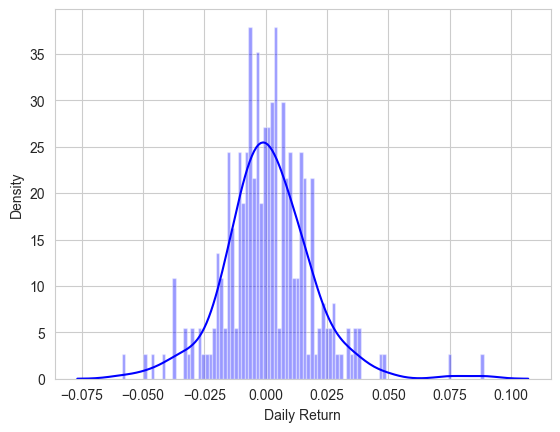

In [55]:
sns.distplot(AAPL['Daily Return'].dropna(),bins = 100,color='blue')
plt.show()

Now want to analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['close'] columns for each of the stocks dataframes.

closing_df1 = pd.DataFrame(AAPL['close'])
close1 = closing_df1.rename(columns = {"close": "AAPL_close"})

closing_df2 = pd.DataFrame(GOOG['close'])
close2 = closing_df2.rename(columns = {"close": "GOOG_close"})

closing_df3 = pd.DataFrame(MSFT['close'])
close3 = closing_df3.rename(columns = {"close": "MSFT_close"})

closing_df4 = pd.DataFrame(AMZN['close'])
close4 = closing_df4.rename(columns = {"close": "AMZN_close"})

closing_df = pd.concat([close1,close2,close3,close4],axis = 1)
closing_df.head()

## Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks.

In [57]:
# Make a new tech returns DataFrame
tech_returns = closing_df.pct_change()

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

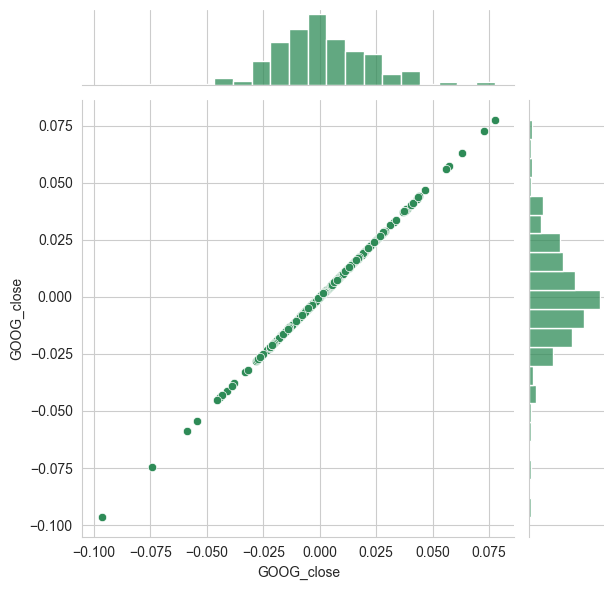

In [60]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x = 'GOOG_close',y = 'GOOG_close',data = tech_returns,kind='scatter',color = 'seagreen')
plt.show()

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

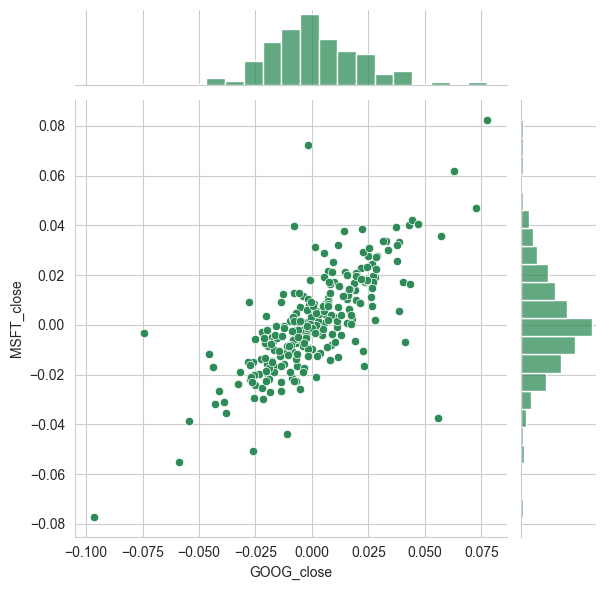

In [62]:
sns.jointplot(x = 'GOOG_close',y = 'MSFT_close',data = tech_returns,kind='scatter',color = 'seagreen')
plt.show()

Python's Seaborn and pandas packages make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot.

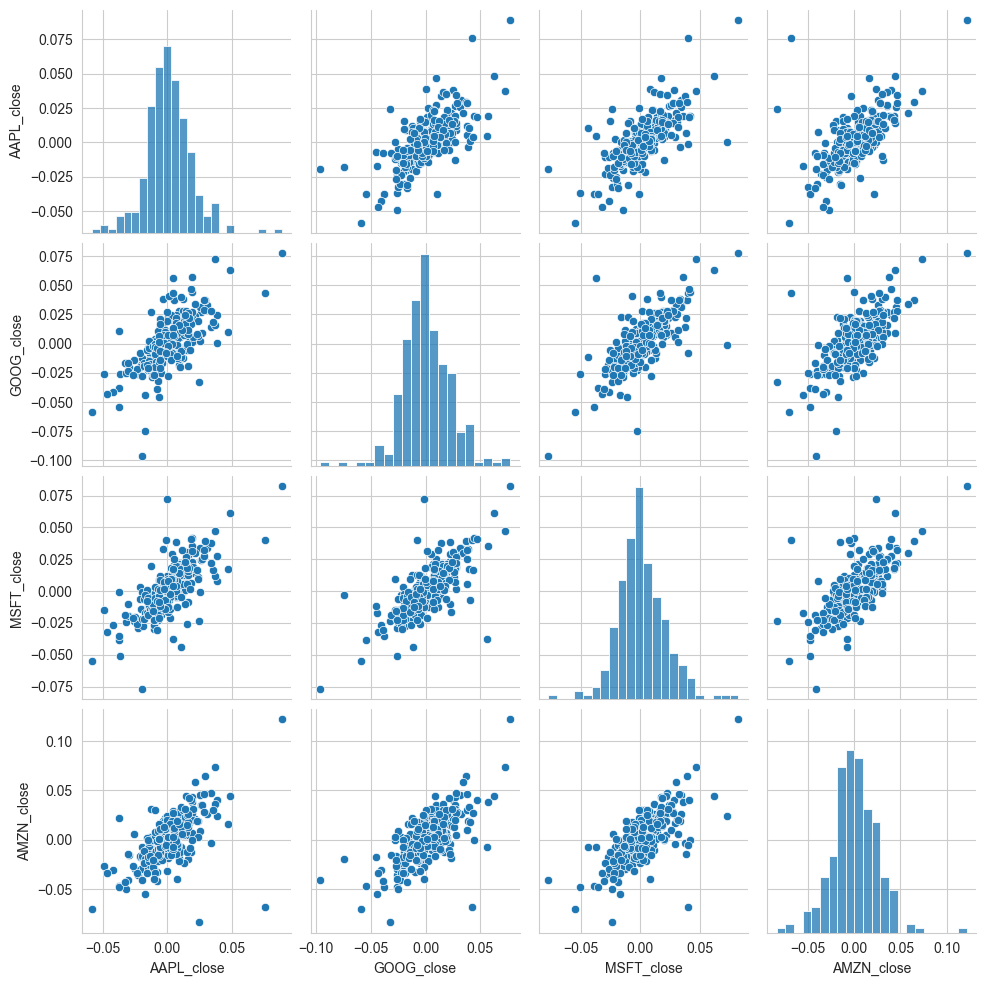

In [63]:
sns.pairplot(tech_returns.dropna())
plt.show()

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

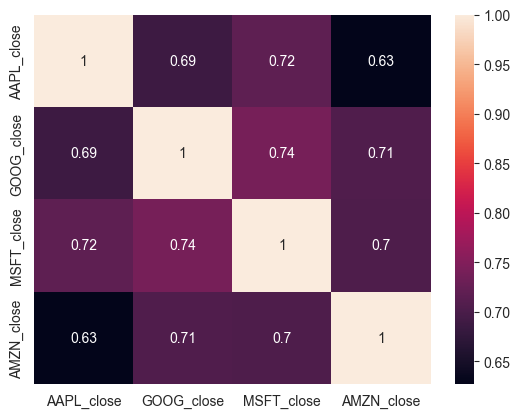

In [65]:
corr = tech_returns.dropna().corr()

sns.heatmap(corr,annot = True)
plt.show()

This means for every initial stock you purchase, you are putting about $37.38 at risk 99% of the time from our Monte Carlo Simulation.